In [ ]:
import torch
torch.__version__

'2.1.0+cu121'

In [ ]:
from sklearn.datasets import make_circles


# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


from matplotlib import pyplot as plt
_df_0['X1'].plot(kind='hist', bins=20, title='X1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['X2'].plot(kind='hist', bins=20, title='X2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='X1', y='X2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='X2', y='label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['X1'].plot(kind='line', figsize=(8, 4), title='X1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['X2'].plot(kind='line', figsize=(8, 4), title='X2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Check different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

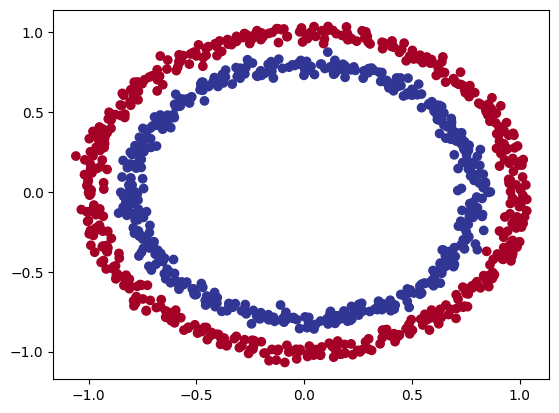

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X, y

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         ...,
         [-0.1369, -0.8100],
         [ 0.6704, -0.7675],
         [ 0.2811,  0.9638]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
         1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
         0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
         1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
         0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
         0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
         1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

# Modeling

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
from sklearn.metrics import accuracy_score

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [ ]:
class Model1(torch.nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = torch.nn.Linear(in_features=2, out_features=10)
    self.layer_2 = torch.nn.Linear(in_features=10, out_features=10)
    self.layer_3 = torch.nn.Linear(in_features=10, out_features=1)
    self.relu = torch.nn.ReLU()

  def forward(self, X):
    layer = self.layer_1(X)
    layer = self.relu(layer)
    layer = self.layer_2(layer)
    layer = self.relu(layer)
    layer = self.layer_3(layer)

    return layer

model_1_0 = Model1().to(device)
model_1_0

Model1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
model_1_1 = torch.nn.Sequential(
    torch.nn.Linear(in_features=2, out_features=10),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=10, out_features=10),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=10, out_features=1)
).to(device)
model_1_1

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# optimizer
optimizer = torch.optim.SGD(params=model_1_1.parameters(), lr=0.1)

# loss
loss_fn = torch.nn.BCEWithLogitsLoss()

for epoch in range(1000):
  model_1_1.train()

  y_logits = model_1_1(X_train).squeeze()
  y_pred_train = torch.round(torch.sigmoid(y_logits))

  loss_train = loss_fn(y_logits, y_train)

  optimizer.zero_grad()

  loss_train.backward()

  optimizer.step()

  if epoch % 100 == 0:
    model_1_1.eval()
    with torch.inference_mode():
      y_logits_loss = model_1_1(X_test).squeeze()
      y_pred_test = torch.round(torch.sigmoid(y_logits_loss))

    loss_test = loss_fn(y_logits_loss, y_test)
    accuracy = accuracy_score(y_test.cpu(), y_pred_test.cpu())
    print(f'epoch {epoch}: accuracy - {accuracy}; loss - {loss_test}')

epoch 0: accuracy - 0.5; loss - 0.7214192152023315
epoch 100: accuracy - 0.65; loss - 0.6892367601394653
epoch 200: accuracy - 0.585; loss - 0.6871876120567322
epoch 300: accuracy - 0.585; loss - 0.6846099495887756
epoch 400: accuracy - 0.63; loss - 0.6807499527931213
epoch 500: accuracy - 0.635; loss - 0.6745902895927429
epoch 600: accuracy - 0.67; loss - 0.6637324094772339
epoch 700: accuracy - 0.73; loss - 0.6411979794502258
epoch 800: accuracy - 0.88; loss - 0.598085343837738
epoch 900: accuracy - 0.945; loss - 0.5280301570892334


In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


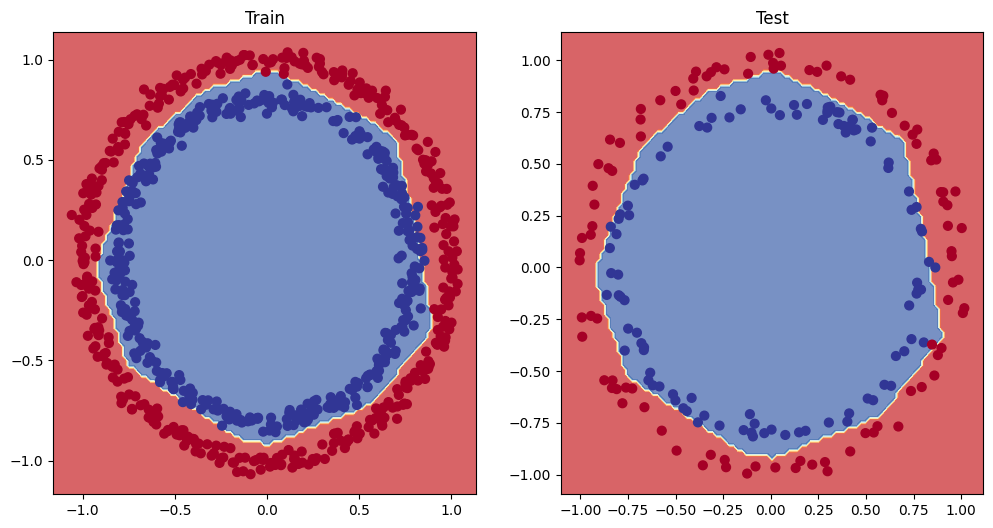

In [ ]:
# Make predictions
model_1_1.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_1_1(X_test))).squeeze()

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1_1, X_test, y_test) # model_3 = has non-linearity

# Putting everything together

### Create data

torch.Size([1000, 2]) torch.Size([1000])
tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


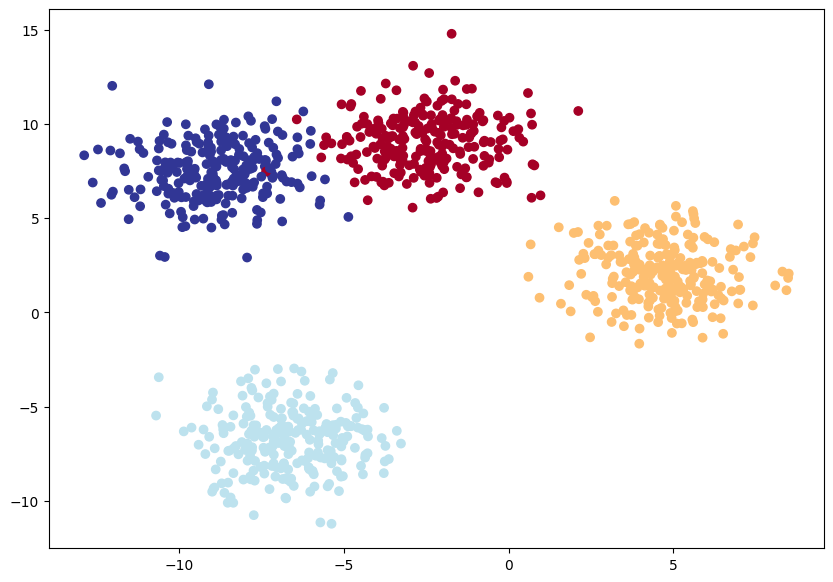

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob.shape, y_blob.shape)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
class BlobModel(torch.nn.Module):
  def __init__(self, in_features, out_features, hidden_units=8):
    super().__init__()

    self.first_layer = torch.nn.Linear(in_features=in_features, out_features=hidden_units)
    self.hidden_layer = torch.nn.Linear(in_features=hidden_units, out_features=hidden_units)
    self.last_layer = torch.nn.Linear(in_features=hidden_units, out_features=out_features)
    self.relu = torch.nn.ReLU()

  def forward(self, x, hidden_layers=3):
    layer = self.first_layer(x)
    layer = self.relu(layer)
    for _ in range(hidden_layers-1):
      layer = self.hidden_layer(layer)
      layer = self.relu(layer)
    layer = self.last_layer(layer)

    return layer
model = BlobModel(2, 4).to(device)
model

BlobModel(
  (first_layer): Linear(in_features=2, out_features=8, bias=True)
  (hidden_layer): Linear(in_features=8, out_features=8, bias=True)
  (last_layer): Linear(in_features=8, out_features=4, bias=True)
  (relu): ReLU()
)

In [ ]:
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)
loss = torch.nn.CrossEntropyLoss()

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

In [ ]:
from sklearn.metrics import accuracy_score

# number of epochs
epochs=1000

for epoch in range(epochs):
  model.train()

  # get prediction
  y_logits = model(X_blob_train)
  y_probs = torch.softmax(y_logits, dim=1)
  y_pred = torch.argmax(y_probs, dim=1)

  # get loss
  loss_train = loss(y_logits, y_blob_train)

  # zero grad
  optimizer.zero_grad()

  # gradient
  loss_train.backward()

  # optimize
  optimizer.step()

  # evaluate
  if epoch % 100 == 0:
    model.eval()
    with torch.inference_mode():
      y_logits = model(X_blob_test)
      y_probs = torch.softmax(y_logits, dim=1)
      y_pred = torch.argmax(y_probs, dim=1)

    accuracy = accuracy_score(y_blob_test.cpu(), y_pred.cpu())
    print(f'Epoch {epoch} - {accuracy}')

Epoch 0 - 0.265
Epoch 100 - 0.985
Epoch 200 - 1.0
Epoch 300 - 1.0
Epoch 400 - 1.0
Epoch 500 - 1.0
Epoch 600 - 1.0
Epoch 700 - 1.0
Epoch 800 - 1.0
Epoch 900 - 1.0


In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


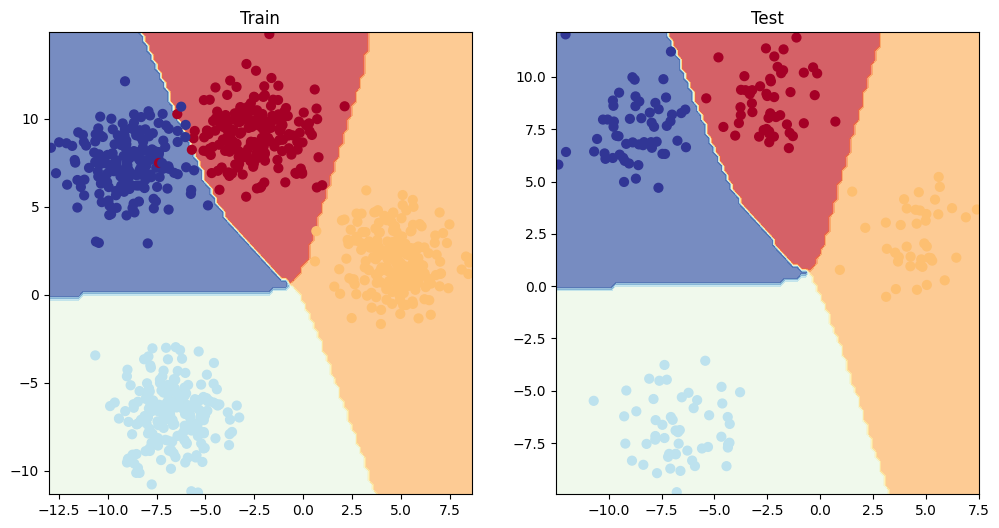

In [ ]:
# Make predictions
model.eval()

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_blob_test, y_blob_test)